In [4]:

# from sage.matrix.all import *
# from sage.graphs.all import *
# from sage.algebras.all import * 

from sage.all import *


In [1]:
#Returns the volume of G

def vol(G):
    V = 0
    for v in G.vertices():
        V+=G.degree(v)
    return V

In [1]:
#Returns the normal transition probabillity matrix P of graph G

def trans_prob_matrix(G):
    A = G.adjacency_matrix()
    D= diagonal_matrix([G.degree(v) for v in G.vertices()])
    Dinv = D^(-1)
    P = Dinv * A
    return P






In [1]:
#Returns the degree matrix D of graph G

def deg_matrix(G):
    return diagonal_matrix([G.degree(v) for v in G.vertices()], sparse = False)

In [4]:
def edge_ordering_dictionary(G):
    D=dict()
    i=0
    for u in G.vertices():
        for v in G.neighbors(u):
            D.setdefault((u,v),i)
            i=i+1
    return D


In [1]:
#Creates probability matrix of the non-backtracking matrix 

def trans_prob_matrix_nb(G):
    L = []
    D=edge_ordering_dictionary(G)
    for a in D.keys():
        i=D[a]
        for b in D.keys():
            j=D[b]
            u=a[0]
            v=a[1]
            x=b[0]
            y=b[1]
            if v==x and y!=u:
                L.append(float(1)/(G.degree(v)-1))
            else: L.append(0)
    P = matrix(vol(G), L)
    return P

In [2]:
#Creates normal edge adjacency matrix C for any graph G

def edge_adjacency_matrix(G):
    L = []
    D=edge_ordering_dictionary(G)
    for a in D.keys():
        i=D[a]
        for b in D.keys():
            j=D[b]
            u=a[0]
            v=a[1]
            x=b[0]
            y=b[1]
            if v==x:
                L.append(1)
            else: L.append(0)
    B = matrix(vol(G), L)
    return B

In [7]:
#creates non-backtracking matrix B for any graph G

def edge_adjacency_nb_matrix(G):
    L = []
    D=edge_ordering_dictionary(G)
    for a in D.keys():
        i=D[a]
        for b in D.keys():
            j=D[b]
            u=a[0]
            v=a[1]
            x=b[0]
            y=b[1]
            if v==x and y!=u:
                L.append(1)
            else: L.append(0)
    B = matrix(vol(G), L) 
    return B

In [9]:
#returns Ihara Matrix of G

def ihara_matrix(G):
    A = G.adjacency_matrix(); D=deg_matrix(G); I = identity_matrix(G.order()); Z=matrix.zero(G.order())
    return block_matrix(QQbar, [[A,D-I],[-I,Z]], subdivide = false)

In [8]:
#uses proposition 5.3 to calculate eigenvalues of Ihara Matrix from A

def compute_K_evals(G):
    K = ihara_matrix(G)
    for A_evec in G.eigenvectors():
        print("lambda: " + str(A_evec[0]))
        for K_evec in K.eigenvectors_right():
            mu = K_evec[0]
            print("Actual mu: " + str(mu))
            G1 = A_evec
            lam = G1[0]
            x_vectors = G1[1]
            for A_evec_same_eval in x_vectors:
                x = list(A_evec_same_eval)
                x = vector(x)
                B_evec = K_evec[1]
                for K_evec_same_eval in B_evec:
                    evec_list = list(K_evec_same_eval)
                    evec_half = evec_list[G.order():]
                    y = vector(evec_half)
                    D = deg_matrix(G)
                    if x*y != 0:
                        mu1_calculated = (lam + sqrt(lam^2 - 4/(x*y)*x*(D - identity_matrix(len(y)))*y)) / 2
                        mu2_calculated = (lam - sqrt(lam^2 - 4/(x*y)*x*(D - identity_matrix(len(y)))*y)) / 2
                        if mu == mu1_calculated or mu == mu2_calculated:
                            print("CORRECT")
                        else:
                            print("INCORRECT")
                    else: 
                        print("x and y are orthogonal")
        print()

In [9]:
#Tries to find all eigenvalues of Ihara Matrix using Proposition 5.3. If not all are found, 
# it prints off the graph of G and a list of eigenvalues that weren't calculated.

#Takes a long time

def find_eigenvalues(G):    
    K = ihara_matrix(G)
    set_of_evals = list(K.eigenvalues())
    for A_evec in G.eigenvectors():
        for K_evec in K.eigenvectors_right():
            mu = K_evec[0]
            lam = A_evec[0]
            x_vectors = A_evec[1]
            for A_evec_same_eval in x_vectors:
                x = list(A_evec_same_eval)
                x = vector(x)
                K_evectors = K_evec[1]
                for K_evec_same_eval in K_evectors:
                    evec_list = list(K_evec_same_eval)
                    evec_half = evec_list[G.order():]
                    y = vector(evec_half)
                    D = deg_matrix(G)
                    if x*y != 0:
                        mu1_calculated = (lam + sqrt(lam^2 - 4/(x*y)*x*(D - identity_matrix(len(y)))*y)) / 2
                        mu2_calculated = (lam - sqrt(lam^2 - 4/(x*y)*x*(D - identity_matrix(len(y)))*y)) / 2
                        if mu == mu1_calculated or mu == mu2_calculated:
                            if mu in set_of_evals:
                                set_of_evals.remove(mu)
    if len(set_of_evals) == 0:
        print("All eigenvalues found")
    else:
        print("These eigenvalues were not found: " + str(set_of_evals))
        show(G)

In [11]:
#returns list of eigenvectors corresponding to jth eigenvalue

def get_ihara_evec(G,j):
    K = ihara_matrix(G)
    K_i = K.eigenvectors_right()[j]
    K_i_evec = K_i[1]
    return K_i_evec

In [12]:
#tells you if the Ihara matrix is diagonalizable

def is_it_diagonalizable(list_of_graphs):
    for g in list_of_graphs:
        k = ihara_matrix(g)
        if k.is_diagonalizable() == False:
            show(g)
            #for d in g.degree_iterator():
            #    if d == 1:
            #        show(g)
        #else:
            #print("FALSE")

In [13]:
#tests cospectrality of B matrix

def are_cospectral(g1,g2):
    g1nb = edge_adjacency_nb_matrix(g1)
    g2nb = edge_adjacency_nb_matrix(g2)
    g1_spectrum = g1nb.eigenvalues()
    g2_spectrum = g2nb.eigenvalues()
    if g1_spectrum == g2_spectrum:
        print("true")
        show(g1)
        print("g1 spectrum is " + str(g1_spectrum))
        print(g1nb)
        show(g2)
        print("g2 spectrum is " + str(g2_spectrum))
        print(g2nb)
    else:
        print("false")

In [2]:
#Testing cospectrality of graphs with 5 vertices


all_graphs = list(graphs.nauty_geng("5 -d2"))
graphs_length = len(all_graphs)
for i in range (0,graphs_length):
    for j in range(0,graphs_length):
        if i != j:
            are_cospectral(all_graphs[i],all_graphs[j])


NameError: name 'graphs' is not defined

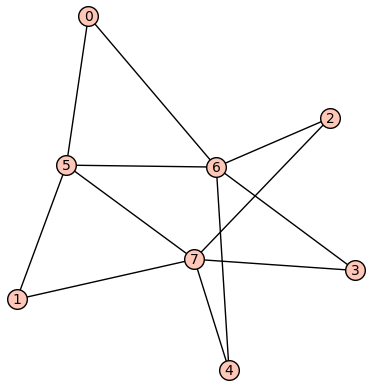

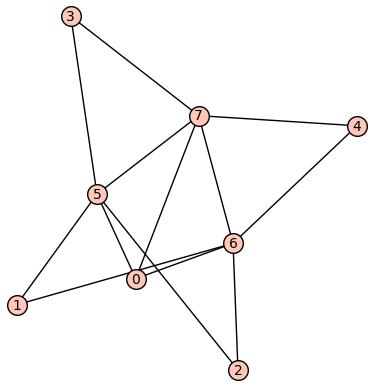

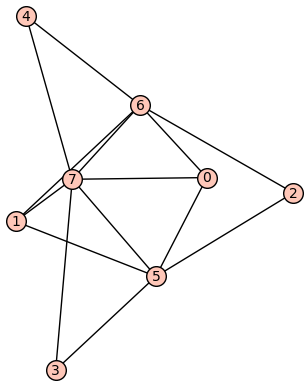

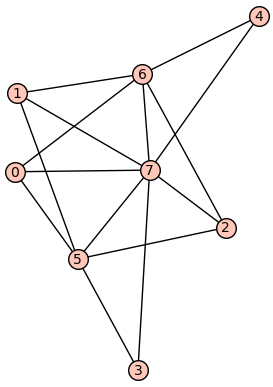

ValueError: intersection of non-overlapping intervals

In [15]:
#Testing diagonalizability of Ihara Matrix of graphs with 8 vertices, connected, and d_min >= 2


all_graphs = graphs.nauty_geng("8 8:0 -c -d2")
#print(len(list(list_of_graphs)))
#for g in all_graphs:
#    find_eigenvalues(g)
is_it_diagonalizable(all_graphs)

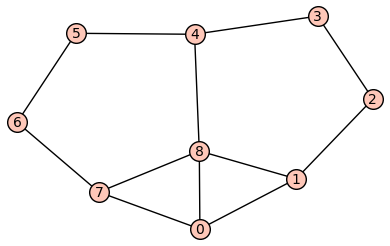

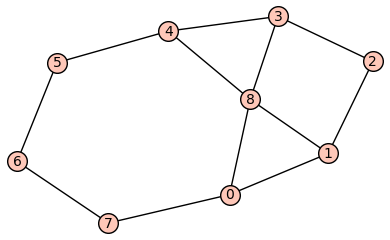

false
[1.795092474344487?, 1, 0.7756222420014765? + 0.951275381864930?*I, 0.7756222420014765? - 0.951275381864930?*I, 0.6745694095891947? + 0.8265587589563592?*I, 0.6745694095891947? - 0.8265587589563592?*I, 0.2288866292524979? + 1.238576997584343?*I, 0.2288866292524979? - 1.238576997584343?*I, 0.?e-54 + 1.242452821113171?*I, 0.?e-54 - 1.242452821113171?*I, -0.4914341036874043? + 1.361075314351993?*I, -0.4914341036874043? - 1.361075314351993?*I, -0.6745694095891947? + 0.8265587589563592?*I, -0.6745694095891947? - 0.8265587589563592?*I, -0.9533081368468846? + 0.6110869931621971?*I, -0.9533081368468846? - 0.6110869931621971?*I, -0.9573128678919288? + 1.080258348961655?*I, -0.9573128678919288? - 1.080258348961655?*I]
[1.802552580358086?, 1, 0.7777808020484684? + 0.7400359161132545?*I, 0.7777808020484684? - 0.7400359161132545?*I, 0.6654569511528135? + 1.102784715200295?*I, 0.6654569511528135? - 1.102784715200295?*I, 0.2270189250046534? + 1.186824173175317?*I, 0.2270189250046534? - 1.186824

In [ ]:
#example of two cospectral graphs with minimum degree at least 2

g1 = {0:[1,7,8], 1:[8,2], 3:[2,4], 5:[4,6], 7:[6,8], 8:[4]}
g1 = Graph(g1)
show(g1)
g2 = {0:[1,7,8], 1:[8,2], 3:[2,8,4], 5:[4,6], 7:[6], 8:[4]}
g2 = Graph(g2)
show(g2)
are_cospectral(g1,g2)
k_g1 = ihara_matrix(g1)
k_g2 = ihara_matrix(g2)
print(k_g1.eigenvalues())

print(k_g2.eigenvalues())

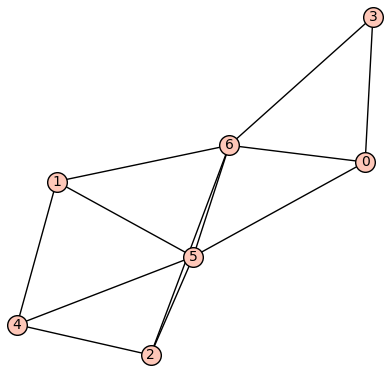

NameError: name 'ihara_matrix' is not defined

In [ ]:
#reconstructing the counter-example to our conjecture about the diagonalizability of Ihara matrices


g = {0:[3,6,5], 1:[4,5,6], 2:[4,5,6], 3:[0,6], 4:[1,2,5], 5:[0,1,2,4,6], 6:[0,3,5]}
sad_graph = Graph(g)
show(sad_graph)
k_sad = ihara_matrix(sad_graph)
print("Is diagonalizable: " + str(k_sad.is_diagonalizable()))
print(k_sad.eigenvalues())
find_eigenvalues(sad_graph)

[0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.2 0.2 0.2 0.2 0.2 0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.2 0.0 0.2 0.2 0.2 0.2 0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.2 0.2 0.0 0.2 0.2 0.2 0.0 0.0 0.0 0.0]
[0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.2 0.2 0.2 0.0 0.2 0.2 0.0 0.0 0.0 0.0]
[1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
[0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0]
[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0

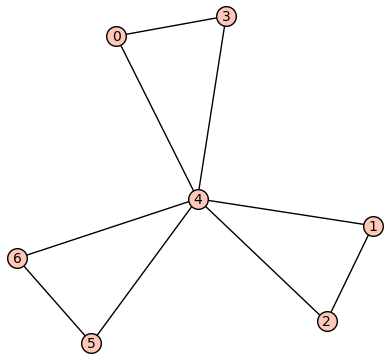

In [ ]:
G = graphs.ButterflyGraph()
G.add_cycle([4, 5, 6])
K = ihara_matrix(G)
P = trans_prob_matrix_nb(G)
print(P)
print(K.is_diagonalizable())
print(P.eigenvalues())
show(G)

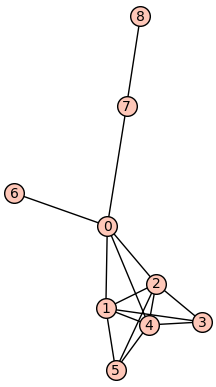

Ihara matrix is diagonalizable: False
[0, -1, -1, -2.432275894706459?, -1.239782941132468?, -0.5653180558400381?, 0.5820380767824201?, 1.431748412515937?, 4.223590402380607?]
lambda: 0
Actual mu: 3.111694220928247?
x and y are orthogonal
Actual mu: 1
x and y are orthogonal
Actual mu: -1.055847110464124? + 1.206703601948119?*I
x and y are orthogonal
Actual mu: -1.055847110464124? - 1.206703601948119?*I
x and y are orthogonal
Actual mu: 0.?e-76 + 1.414213562373095?*I
CORRECT
CORRECT
Actual mu: 0.?e-76 - 1.414213562373095?*I
CORRECT
CORRECT
Actual mu: -0.500000000000000? + 1.936491673103709?*I
x and y are orthogonal
x and y are orthogonal
Actual mu: -0.500000000000000? - 1.936491673103709?*I
x and y are orthogonal
x and y are orthogonal
Actual mu: 0
x and y are orthogonal
x and y are orthogonal

lambda: -1
Actual mu: 3.111694220928247?
x and y are orthogonal
x and y are orthogonal
Actual mu: 1
x and y are orthogonal
x and y are orthogonal
Actual mu: -1.055847110464124? + 1.206703601948119

In [ ]:
#An example of proposition 5.3 calculating the eigenvalues of the Ihara Matrix of some graph on 9 vertices

G = deg_two_graph(6,0.5)
G.add_vertices([6, 7, 8])
G.add_edges([(6,0),(7,0),(8,7)])
show(G)
K = ihara_matrix(G)
print("Ihara matrix is diagonalizable: " + str(K.is_diagonalizable()))
print(G.adjacency_matrix().eigenvalues())
compute_K_evals(G)